In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
  

In [ ]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df . head()

Data Cleaning 

In [ ]:
df.info()

In [5]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [9]:
df.isnull


<bound method DataFrame.isnull of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  

Parents Marital Status Percentage

In [ ]:
p=df['ParentMaritalStatus'].value_counts().reset_index()
b = p['count'].sum()
p['count'] = p['count']*100/b
p



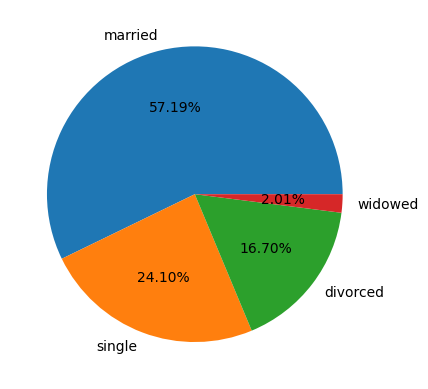

In [19]:
x=p['ParentMaritalStatus']
plt.pie('count',labels=x,data=p,autopct='%1.2f%%')
plt.show()

Transports Means of Students According to Parents marital status

In [45]:
q=df.groupby(['ParentMaritalStatus','TransportMeans']).sum().reset_index()
q[['ParentMaritalStatus','TransportMeans','Unnamed: 0']] 

,ParentMaritalStatus,TransportMeans,Unnamed: 0
0,divorced,private,904597
1,divorced,school_bus,1322003
2,married,private,3156591
3,married,school_bus,4423810
4,single,private,1316100
5,single,school_bus,1878653
6,widowed,private,102578
7,widowed,school_bus,148433


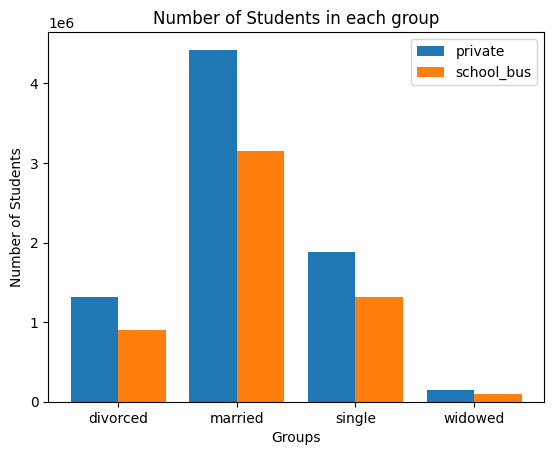

In [57]:
x=q['ParentMaritalStatus'].iloc[[0,2,4,6]].tolist()
Ygirl =   q[q['TransportMeans']=='school_bus']['Unnamed: 0']
Zboy =  q[q['TransportMeans']=='private']['Unnamed: 0']
  
X_axis = np.arange(4)
  
plt.bar(X_axis - 0.2, Ygirl, 0.4, label = 'private') 
plt.bar(X_axis + 0.2, Zboy, 0.4, label = 'school_bus') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 

Study hours Of Boys Vs Girls

In [46]:
p=df[['WklyStudyHours','Gender']].groupby('Gender')
data2=p.value_counts().reset_index()
data2

,Gender,WklyStudyHours,count
0,female,5 - 10,8209
1,female,< 5,4126
2,female,> 10,2593
3,male,5 - 10,8037
4,male,< 5,4112
5,male,> 10,2609


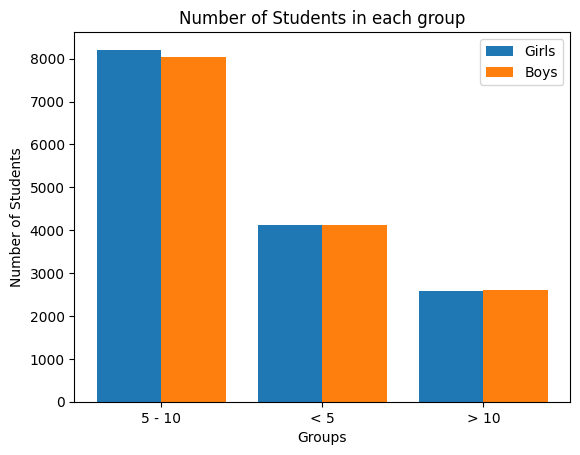

In [47]:
x=data2['WklyStudyHours'].loc[0 :2].tolist()
Ygirls =   data2[data2['Gender']=='female']['count']
Zboys =  data2[data2['Gender']=='male']['count']
  
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls') 
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 

In [98]:
x=data2['WklyStudyHours'].value_counts().tolist()
x

[2, 2, 2]

In [99]:
data2[data2['Gender']=='female']['WklyStudyHours'].tolist()

['5 - 10', '< 5', '> 10']

In [100]:
data2['WklyStudyHours'].loc[0 :2].tolist()

['5 - 10', '< 5', '> 10']

In [101]:
df['TransportMeans'].value_counts().reset_index()

,TransportMeans,count
0,school_bus,16145
1,private,11362


In [114]:
g=df['TransportMeans'].replace(np.NaN,'na').value_counts().reset_index()


,TransportMeans,count
0,school_bus,16145
1,private,11362
2,na,3134


Study Hours Vs Sports Relation

In [106]:
g=df[['WklyStudyHours','PracticeSport']].groupby('PracticeSport')
l=g.value_counts().reset_index()
l

,PracticeSport,WklyStudyHours,count
0,never,5 - 10,2118
1,never,< 5,1053
2,never,> 10,689
3,regularly,5 - 10,5689
4,regularly,< 5,2931
5,regularly,> 10,1851
6,sometimes,5 - 10,8092
7,sometimes,< 5,4093
8,sometimes,> 10,2559


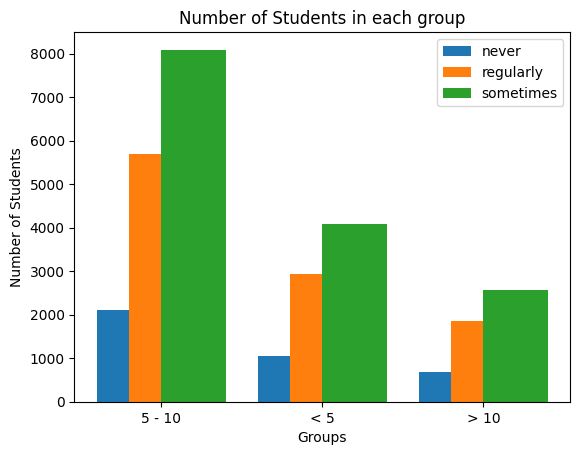

In [69]:
x=l['WklyStudyHours'].loc[0 :2].tolist()
Ygirl =   l[l['PracticeSport']=='never']['count']
Zboy =  l[l['PracticeSport']=='regularly']['count']
Zbo =  l[l['PracticeSport']=='sometimes']['count']
  
X_axis = np.arange(3)
  
plt.bar(X_axis - 0.2, Ygirl, 0.4, label = 'never') 
plt.bar(X_axis , Zboy, 0.4, label = 'regularly') 
plt.bar(X_axis + 0.2, Zbo, 0.4, label = 'sometimes') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 

No of Siblings Vs Study Hours

In [4]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [44]:
b = df[['WklyStudyHours','NrSiblings','Gender']].groupby(['NrSiblings','WklyStudyHours']).count().reset_index()

b

,NrSiblings,WklyStudyHours,Gender
0,0.0,5 - 10,1638
1,0.0,< 5,868
2,0.0,> 10,498
3,1.0,5 - 10,4369
4,1.0,< 5,2188
5,1.0,> 10,1374
6,2.0,5 - 10,3566
7,2.0,< 5,1848
8,2.0,> 10,1184
9,3.0,5 - 10,3275


In [49]:
X1 = b[b['WklyStudyHours']=='< 5']
X2 = b[b['WklyStudyHours']=='> 10']
X3 = b[b['WklyStudyHours']=='5 - 10']
X3

,NrSiblings,WklyStudyHours,Gender
0,0.0,5 - 10,1638
3,1.0,5 - 10,4369
6,2.0,5 - 10,3566
9,3.0,5 - 10,3275
12,4.0,5 - 10,1559
15,5.0,5 - 10,702
18,6.0,5 - 10,154
21,7.0,5 - 10,155


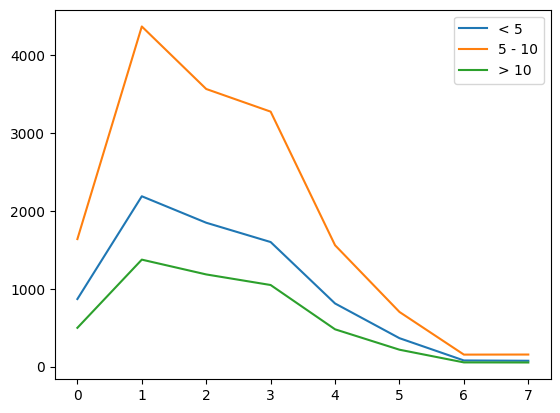

In [52]:
plt.plot(X1.NrSiblings, X1.Gender, label = "< 5") 
plt.plot(X1.NrSiblings, X3.Gender, label = "5 - 10")
plt.plot(X1.NrSiblings, X2.Gender, label = "> 10")
plt.legend() 
plt.show()